### Causal Inference

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# Reading the .data file using pandas
df_causal = pd.read_csv('complete_dataset.csv')
dfc = df_causal.copy()

In [4]:
dfc

,Unnamed: 0,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer,flag,host_response_time_indicator,host_response_rate_indicator,host_acceptance_rate_indicator,bedrooms_indicator,description_indicator,beds_indicator,bathrooms_text_indicator,name_indicator,station_distance_km,rating_cat,starbucks
0,0,05-02-21,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Jennifer,09-09-08,A New Yorker since 2000! My passion is creatin...,within a few hours,0.93,0.26,0,6,"['email', 'phone', 'reviews', 'offline_governm...",1,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,2,1 bath,1.02934,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",100,30,1125,48,0,21-11-09,04-11-19,94,0,0.35,3,151,67,9,31,4532,4094,459,50.000000,1,0,0,0,0,1,0,0,0,0,0.094983,2,50
1,1,05-02-21,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",LisaRoxanne,07-12-08,Laid-back Native New Yorker (formerly bi-coast...,within a few hours,0.98,0.93,0,1,"['email', 'phone', 'reviews', 'offline_governm...",1,Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,3,1 bath,1.00000,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",73,1,730,386,3,30-09-14,27-01-21,90,0,4.99,8,165,35,6,35,4443,2320,9,24.333333,1,1,0,0,0,0,0,0,0,0,0.415369,1,50
2,3,05-02-21,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Shunichi,03-03-09,I used to work for a financial industry but no...,within a day,1.00,1.00,0,1,"['email', 'phone', 'facebook', 'reviews']",0,Midtown,Manhattan,40.76468,-73.98315,Private room,2,1 bath,1.00000,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",79,2,14,474,0,06-05-09,25-09-20,84,0,3.31,5,165,21,4,18,4357,4293,133,39.500000,1,1,0,0,0,0,0,0,0,0,0.343883,1,50
3,5,05-02-21,"Lovely Room 1, Garden, Best Area, Legal rental","Discounted now! Beautiful house, gorgeous ga...",Laurie,10-03-09,"Hello, \r\nI will be welcoming and helpful, w...",within an hour,1.00,1.00,1,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,South Slope,Brooklyn,40.66829,-73.98779,Private room,2,1.5 baths,1.00000,0.0,"[""Shampoo"", ""Air conditioning"", ""Free street p...",83,4,90,182,0,23-04-09,17-10-20,94,0,1.27,8,159,100,7,24,4350,4306,111,41.500000,1,1,0,0,0,0,0,0,0,0,0.276995,2,50
4,8,06-02-21,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,Cyn,12-05-09,Capturing the Steinbeck side of life in its Fi...,within an hour,1.00,1.00,0,3,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,East Harlem,Manhattan,40.78962,-73.94802,Private room,1,1 shared bath,1.00000,1.0,"[""Hair dryer"", ""Stove"", ""Breakfast"", ""Smoke al...",62,30,700,233,0,28-10-09,09-12-19,98,1,1.70,4,176,30,5,18,4288,4119,425,62.000000,1,1,0,0,0,0,0,0,0,0,0.678855,3,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,36581,06-02-21,Stop&Rest.Eat&Sleep. For busy bodies on the move.,Private room in a beautiful home in Queens. lo...,Jazz,29-12-17,"Down to earth, fun lover with an eye for excit...",within an hour,1.00,1.00,0,0,"['email', 'phone']",0,Jamaica,Queens,40.69532,-73.79700,Private room,2,1 private bath,1.00000,1.0,"[""First aid kit"", ""Outdoor dining area"", 

In [5]:
pip install dowhy

In [6]:
pip install graphviz

In [7]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter
import dowhy.api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Treatment
For the causality analysis, we will be looking at the effect of two chosen treatments,:
1. Number of Starbucks in the area
2. Distance from nearest train station

on 2 outcome variables:
1.   AirBNB Rating
2.   AirBNB Price



#### **Causal Graph 1**

In [8]:
# Causal Graph on AirBNB Rating
causal_graph = """digraph 
{starbucks -> review_scores_rating;
station_distance_km -> review_scores_rating;
bedrooms -> review_scores_rating;
last_review_days -> review_scores_rating;
amenities_length -> review_scores_rating;
host_acceptance_rate -> review_scores_rating;
verifications_length -> review_scores_rating;
host_since_days -> review_scores_rating;
host_about_length -> review_scores_rating;
}"""

##### **Model 1** - Number of Starbucks in the area
##### **Target Variable** - Review Scores Rating

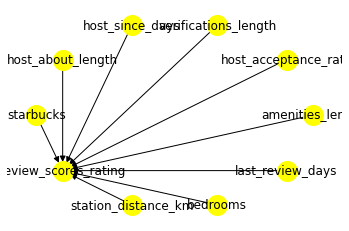

In [9]:
# Model 1 - Number of Starbucks and Review Scores Rating
model1= CausalModel(
        data=dfc,
        treatment='starbucks',
        outcome="review_scores_rating",
        graph = causal_graph.replace("\n", " "),
        common_causes=['starbucks','station_distance_km','bedrooms','last_review_days','amenities_length','host_acceptance_rate','verifications_length','host_since_days','host_about_length'])
model1.view_model()

In [10]:
identified_estimand1 = model1.identify_effect(proceed_when_unidentifiable=True)

In [11]:
causal_estimate1 = model1.estimate_effect(identified_estimand1, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate1)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(review_scores_rating|station_distance_km,host_since_d
d[starbucks]                                                                  

                                                                              
ays,host_about_length,amenities_length,host_acceptance_rate,verifications_leng
                                                                              

                              
th,bedrooms,last_review_days))
                              
Estimand assumption 1, Unconfoundedness: If U→{starbucks} and U→review_scores_rating then P(review_scores_rating|starbucks,station_distance_km,host_since_days,host_about_length,amenities_length,host_acceptance_rate,verifications_length,bedrooms,last_review_days,U) = P(review_scores_rati

##### **Model 2** - Closest Train Station Distance (in km)
##### **Target Variable** - Review Scores Rating

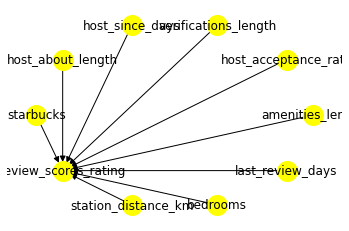

In [12]:
# Model 2 - Closest Train Station Distance and Review Scores Rating
model2= CausalModel(data=dfc,
        treatment='station_distance_km',
        outcome="review_scores_rating",
        graph = causal_graph.replace("\n", " "),
        common_causes=['starbucks','station_distance_km','bedrooms','last_review_days','amenities_length','host_acceptance_rate','verifications_length','host_since_days','host_about_length'])
model2.view_model()

In [13]:
identified_estimand2 = model2.identify_effect(proceed_when_unidentifiable=True)

In [14]:
causal_estimate2 = model2.estimate_effect(identified_estimand2, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate2)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
──────────────────────(Expectation(review_scores_rating|host_since_days,starbu
d[station_distance_km]                                                        

                                                                              
cks,host_about_length,amenities_length,host_acceptance_rate,verifications_leng
                                                                              

                              
th,bedrooms,last_review_days))
                              
Estimand assumption 1, Unconfoundedness: If U→{station_distance_km} and U→review_scores_rating then P(review_scores_rating|station_distance_km,host_since_days,starbucks,host_about_length,amenities_length,host_acceptance_rate,verifications_length,bedrooms,last_review_days,U) = P(review_s

#### **Causal Graph 2**

In [15]:
# Causal Graph on AirBNB Price per accomodate
causal_graph2 = """digraph 
{starbucks -> price_per_accommodates;
station_distance_km -> price_per_accommodates;
bedrooms -> price_per_accommodates;
last_review_days -> price_per_accommodates;
amenities_length -> price_per_accommodates;
host_acceptance_rate -> price_per_accommodates;
verifications_length -> price_per_accommodates;
host_since_days -> price_per_accommodates;
host_about_length -> price_per_accommodates;
}"""

##### **Model 3** - Number of Starbucks in the area
##### **Target Variable** - Price per accommodates

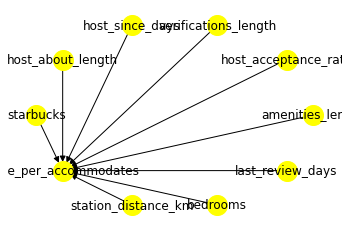

In [16]:
# Model 3 - Number of Starbucks in the area and price per accomodates
model3= CausalModel(data=dfc,
        treatment='starbucks',
        outcome="price_per_accommodates",
        graph = causal_graph2.replace("\n", " "),
        common_causes=['starbucks','station_distance_km','bedrooms','last_review_days','amenities_length','host_acceptance_rate','verifications_length','host_since_days','host_about_length'])
model3.view_model()

In [17]:
identified_estimand3 = model3.identify_effect(proceed_when_unidentifiable=True)

In [18]:
causal_estimate3 = model3.estimate_effect(identified_estimand3, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate3)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(price_per_accommodates|station_distance_km,host_since
d[starbucks]                                                                  

                                                                              
_days,host_about_length,amenities_length,host_acceptance_rate,verifications_le
                                                                              

                                
ngth,bedrooms,last_review_days))
                                
Estimand assumption 1, Unconfoundedness: If U→{starbucks} and U→price_per_accommodates then P(price_per_accommodates|starbucks,station_distance_km,host_since_days,host_about_length,amenities_length,host_acceptance_rate,verifications_length,bedrooms,last_review_days,U) = P(price_pe

##### **Model 4** - Closest Train Station Distance (in km)
##### **Target Variable** - Price per accommodates

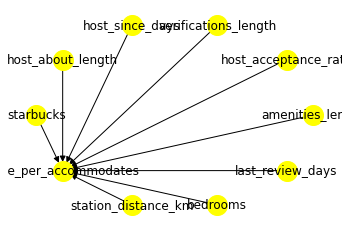

In [19]:
# Model 4 - Closest Train Station Distance and price per accomodates
model4= CausalModel(data=dfc,
        treatment='station_distance_km',
        outcome="price_per_accommodates",
        graph = causal_graph2.replace("\n", " "),
        common_causes=['starbucks','station_distance_km','bedrooms','last_review_days','amenities_length','host_acceptance_rate','verifications_length','host_since_days','host_about_length'])
model4.view_model()

In [20]:
identified_estimand4 = model4.identify_effect(proceed_when_unidentifiable=True)

In [21]:
causal_estimate4 = model4.estimate_effect(identified_estimand4, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate4)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
──────────────────────(Expectation(price_per_accommodates|host_since_days,star
d[station_distance_km]                                                        

                                                                              
bucks,host_about_length,amenities_length,host_acceptance_rate,verifications_le
                                                                              

                                
ngth,bedrooms,last_review_days))
                                
Estimand assumption 1, Unconfoundedness: If U→{station_distance_km} and U→price_per_accommodates then P(price_per_accommodates|station_distance_km,host_since_days,starbucks,host_about_length,amenities_length,host_acceptance_rate,verifications_length,bedrooms,last_review_days,U) = 

**Results:**

**Model 1:**                                     
Number of Starbucks and Review Scores Rating 
<br>Mean value: 0.003231172176185737
<br>p-value: 0.04047677 
<br>Inference: **Significant**  **(*)**

Thus, we can say that the number of starbucks in the neighborhood does have a positive impact on the the AirBNB Review Scores Rating (although marginal).

<br>**Model 2:**
<br>Closest Train Station Distance and Review Scores Rating
<br>Mean value: -0.002887094771580223
<br>p-value: 0.19418372
<br>Inference: **Not Significant**  **(.)**

Thus, we can say that the distance of the closest train station does have any statistically significant impact on the the AirBNB Review Scores Rating.

<br>**Model 3:**                                     
Number of Starbucks and Price per accommodates 
<br>Mean value: -0.06782232293168278
<br>p-value: 0.22349717
<br>Inference: **Not Significant**  **(.)**

Thus, we can say that the number of Starbucks does have any statistically significant impact on the the AirBNB Price per accomodate, which is contrary to the "Starbucks Effect" found typically in residential real estate industry. This might also be due to the presence of other cafes and restaurants in the neighborhood.

<br>**Model 4:**                                     
Closest Train Station Distance and Price per accommodates 
<br>Mean value: -4.216259842350333
<br>p-value: 0.03357141
<br>Inference: **Significant**  **(*)**

Thus, we can say that as the distance of the AirBNB listing from the nearest Train Station increases, the price per accommodate decreases. 